In [2]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [4]:
train = pd.read_csv('F:\dataset\sign_train.csv')
test = pd.read_csv('F:\dataset\sign_test.csv')

In [5]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')


In [6]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  L


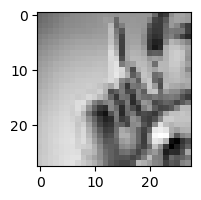

In [7]:
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])


Text(0.5, 1.0, 'Label')

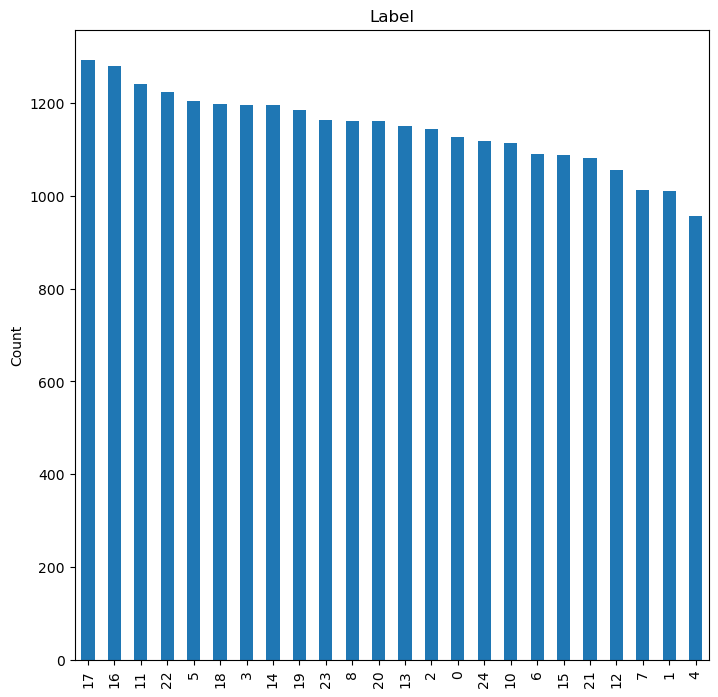

In [8]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [9]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [10]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [11]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

: 

In [13]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [14]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("mini_Project_Model-{epoch:02d}.h5")

In [15]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))
callbacks=[checkpoint_cb]

Epoch 1/10
215/215 [==============================] - 13s 58ms/step - loss: 2.3955 - acc: 0.2622 - val_loss: 1.2708 - val_acc: 0.5916
Epoch 2/10
215/215 [==============================] - 12s 54ms/step - loss: 0.8995 - acc: 0.6962 - val_loss: 0.6647 - val_acc: 0.7764
Epoch 3/10
215/215 [==============================] - 11s 51ms/step - loss: 0.4951 - acc: 0.8370 - val_loss: 0.4691 - val_acc: 0.8429
Epoch 4/10
215/215 [==============================] - 13s 60ms/step - loss: 0.3155 - acc: 0.8970 - val_loss: 0.3561 - val_acc: 0.8804
Epoch 5/10
215/215 [==============================] - 14s 66ms/step - loss: 0.2160 - acc: 0.9316 - val_loss: 0.2867 - val_acc: 0.9007
Epoch 6/10
215/215 [==============================] - 13s 60ms/step - loss: 0.1557 - acc: 0.9497 - val_loss: 0.2489 - val_acc: 0.9197
Epoch 7/10
215/215 [==============================] - 12s 54ms/step - loss: 0.1180 - acc: 0.9627 - val_loss: 0.2289 - val_acc: 0.9282
Epoch 8/10
215/215 [==============================] - 12s 56ms

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

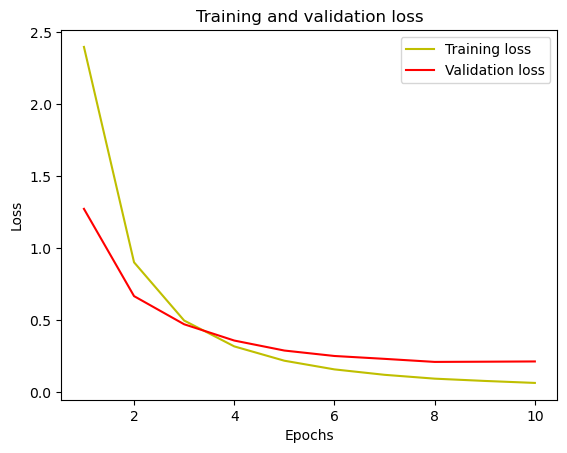

In [17]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

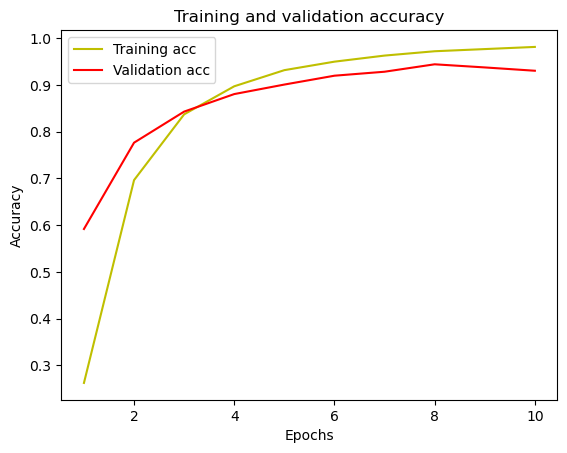

In [19]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
prediction = np.argmax(model.predict(X_test),axis=-1)


225/225 [==============================] - 1s 3ms/step


In [21]:

model.save("model.hdf5")

In [22]:
from sklearn.metrics import accuracy_score


In [23]:
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9302844394868934


Predicted Label:  B
True Label:  B


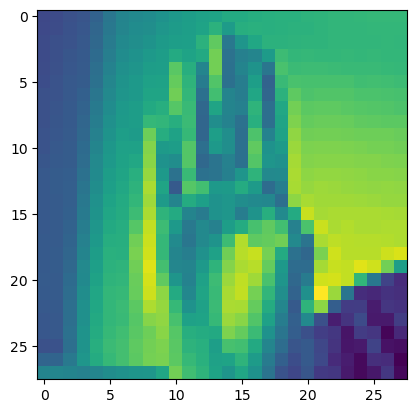

In [24]:
#i = random.randint(1,len(prediction))
i=199
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])